In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA", # values: MT, PA, MS, PI
	"training_date": "current", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 10
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'single_run', 'uncertainty_method': 'pred_entropy_single', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'single_run',
 'uncertainty_method': 'pred_entropy_single',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

10

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


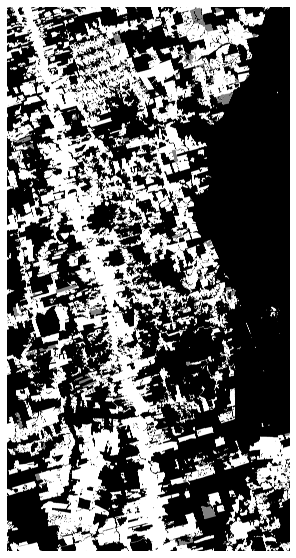

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4077704,   24058, 4054038], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([4018062,  155579, 3982159], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3765218,  334364, 4056218], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6201069,  140180, 1814551], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907947,   93438, 4154415], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353664,   51100, 3751036], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5004385,   64045, 3087370], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8148413,    7387], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5158561,  138139, 2859100], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475926,   83519, 4596355], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4668613,  107494, 3379693], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750580

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

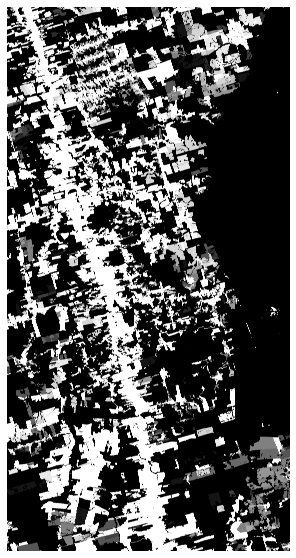

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

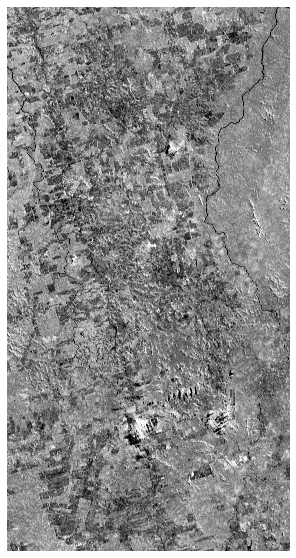

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([101787197,   1842912,  59485891], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

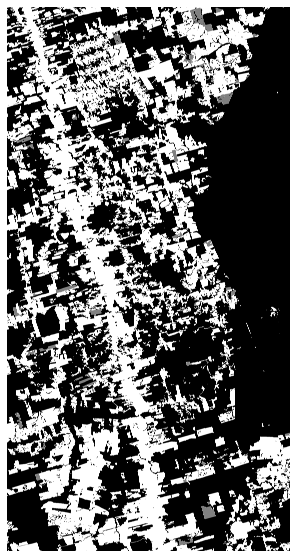

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:113 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


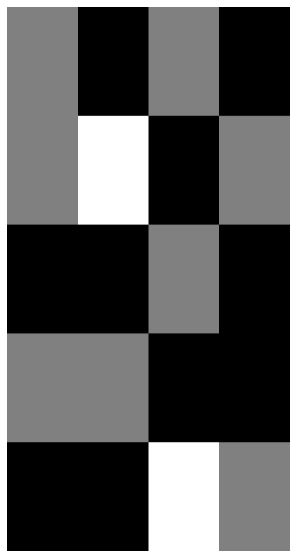

In [28]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38533200,   804466, 25908734], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9180568,  271248, 6859784], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([54073429,   767198, 26717373], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([101787197,   1842912,  59485891], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.591 0.012 0.397]
val unique [0.563 0.017 0.421]
test unique [0.663 0.009 0.328]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [33]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:129 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [35]:
if config["training"] == True:
    manager.label_mask.shape

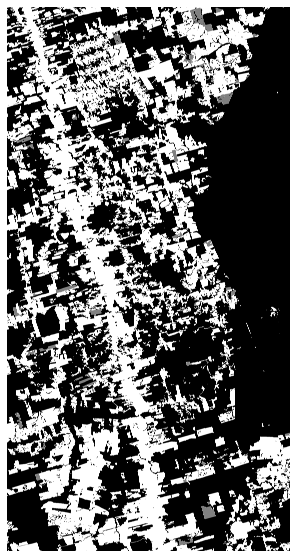

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3756, 3) validation samples:  (1032, 3)


In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

ic

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


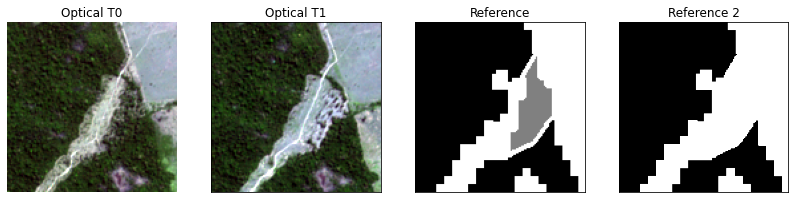

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


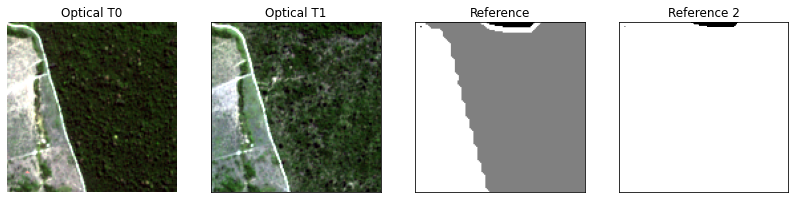

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


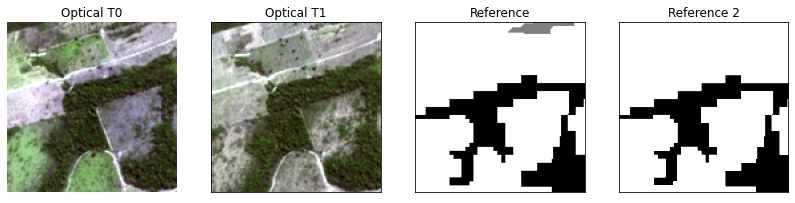

In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


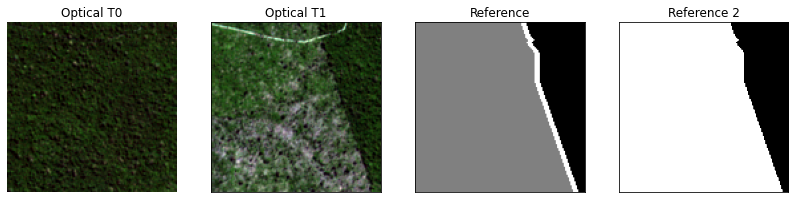

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


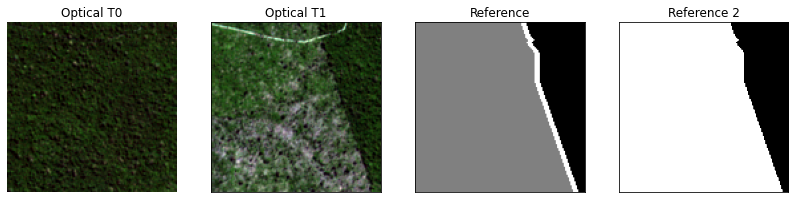

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp10


In [54]:
if config["training"] == True:
    print(manager.channels)

21


In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [57]:
manager.class_n

2

In [58]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
352/352 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.4944K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
352/352 [==============================] - 37s 92ms/step - loss: 0.1982 - accuracy: 0.4944 - val_loss: 0.1397 - val_accuracy: 0.6421

Epoch 00001: val_loss improved from inf to 0.13967, saving model to D:/Jorge/datasets/deforestation/experiments/PA/e

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
352/352 [==============================] - 31s 89ms/step - loss: 0.1457 - accuracy: 0.5464 - val_loss: 0.1171 - val_accuracy: 0.6492

Epoch 00002: val_loss improved from 0.13967 to 0.11711, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp10/models\resunet_0.h5
Epoch 3/100
352/352 [==============================] - 31s 89ms/step - loss: 0.1346 - accuracy: 0.5533 - val_loss: 0.1173 - val_accuracy: 0.6513

Epoch 00003: val_loss did not improve from 0.11711
Epoch 4/100
352/352 [==============================] - 31s 89ms/step - loss: 0.1290 - accuracy: 0.5572 - val_loss: 0.1155 - val_accuracy: 0.6441

Epoch 00004: val_loss improved from 0.11711 to 0.11554, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp10/models\resunet_0.h5
Epoch 5/100
352/352 [==============================] - 32s 91ms/step - loss: 0.1252 - accuracy: 0.5599 - val_loss: 0.1156 - val_accuracy: 0.6455

Epoch 00005: val_loss did not improve from 0.11554
Epoch 6/100
352/352 [===

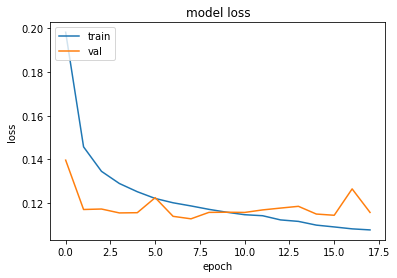

In [59]:
if config["training"] == True:
    manager.plotHistory()


In [60]:
repetition_id = 0

In [61]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [62]:
manager.image_stack.shape

(17730, 9200, 21)

In [63]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [64]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [65]:
manager.image_stack.shape

(17730, 9200, 21)

In [66]:
manager.setPadding()

-30.0 -16.0


In [67]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential

def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                '''
                args_network = {'patch_size_rows': patch_size_rows,
                    'patch_size_cols': patch_size_cols,
                    'c': c,
                    'nb_filters': nb_filters,
                    'class_n': class_n,
                    'dropout_seed': inference_times}
                '''
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad

In [68]:

import types

manager.infer = types.MethodType(infer, manager)



In [69]:
manager.infer()

ic| 1738674457.py:13 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp10/models/resunet_0.h5'


Dropout training mode: False
time:  0


In [70]:
manager.loadPredictedProbabilities()

In [71]:
manager.prob_rec.shape

(17760, 9216, 2, 1)

In [72]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [73]:
manager.prob_rec.shape

(17760, 9216, 2, 1)

In [74]:
manager.getMeanProb()

In [75]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 1.7946831e-13
    np.mean(value): 0.053505674
    np.max(value): 0.9999914


In [76]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [77]:
manager.unpadMeanProb()

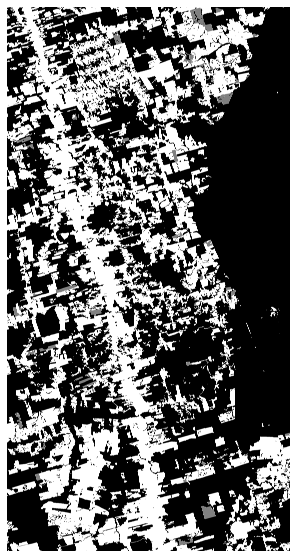

In [78]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [79]:
manager.squeezeLabel()

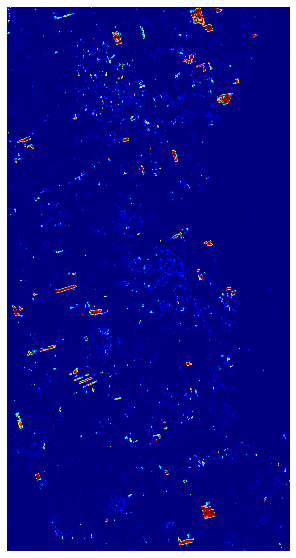

In [80]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [81]:
print(manager.label_mask.shape)

(17730, 9200)


In [82]:
# manager.getLabelTest()

In [83]:
# manager.getMAP()

In [84]:
manager.prob_rec.shape

(17760, 9216, 2, 1)

In [85]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(1, 17760, 9216, 2)


In [86]:
manager.prob_rec.shape

(1, 17760, 9216, 2)

In [87]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 1.7946831e-13
    np.mean(value): 0.5
    np.max(value): 1.0


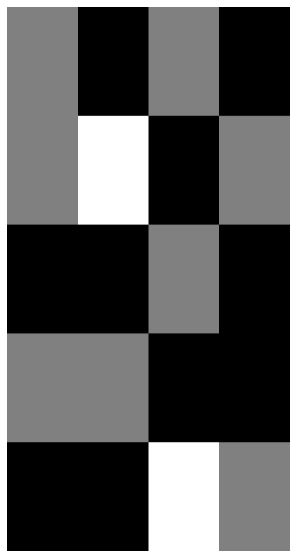

In [88]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [89]:
manager.getLabelCurrentDeforestation()

In [90]:
manager.applyProbabilityThreshold()

(17730, 9200)
Single entropy
(array([0., 1.], dtype=float32), array([161088037,   2027963], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [91]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (54840627,)


In [92]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161225184,   1890816], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161412940,   1703060], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162928244,    187756], dtype=int64))


In [93]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 85.22
    self.precision: 89.5
    self.recall: 81.33


In [94]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9433026,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 85.65
    precision_val: 82.04
    recall_val: 89.59
    mAP_val: 86.28


In [95]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [96]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [97]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([162556250,    559750], dtype=int64))


In [98]:
manager.getErrorMaskToShowRGB()

[0. 1.]


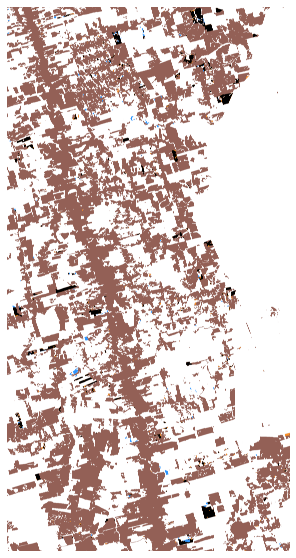

In [99]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [100]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [101]:
manager.setUncertainty()

ic| uncertainty.py:49 in single_experiment_entropy()
    pred_entropy.shape: (17760, 9216)


In [102]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [103]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 7.5974895e-12
    np.mean(value): 0.20268346
    np.max(value): 1.0


In [104]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.029548781
    np.max(value): 1.0


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

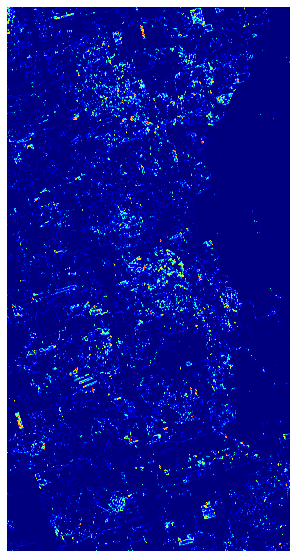

In [105]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



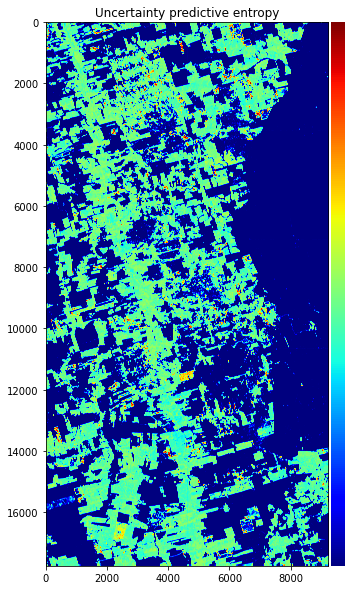

In [106]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [107]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (54744486,)


ic| Logger.py:163 in plotCropSample()
    manager.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    manager.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| Logger.py:165 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


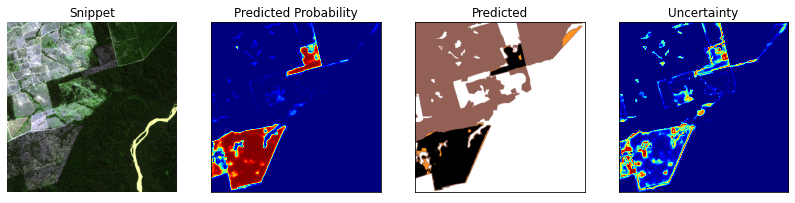

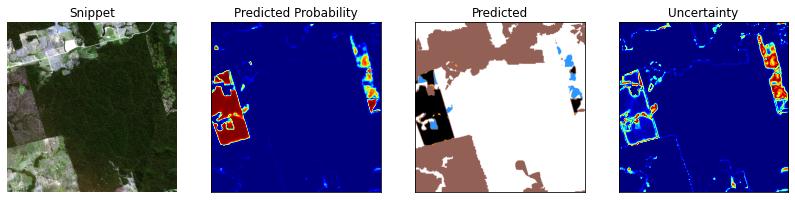

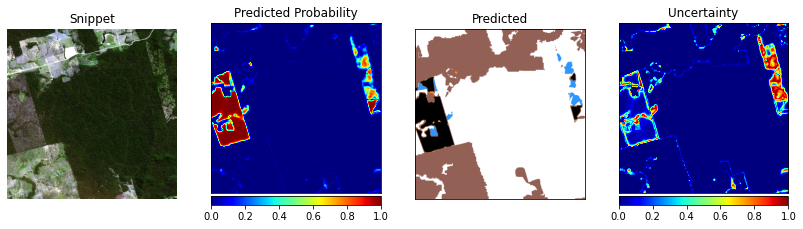

In [108]:
manager.logger.plotCropSample(manager)

In [109]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [110]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [111]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


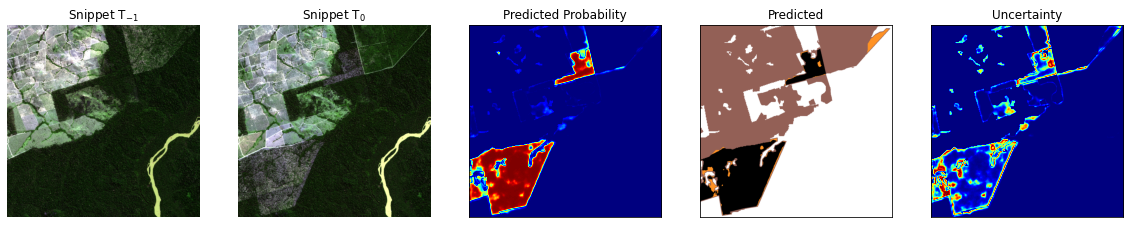

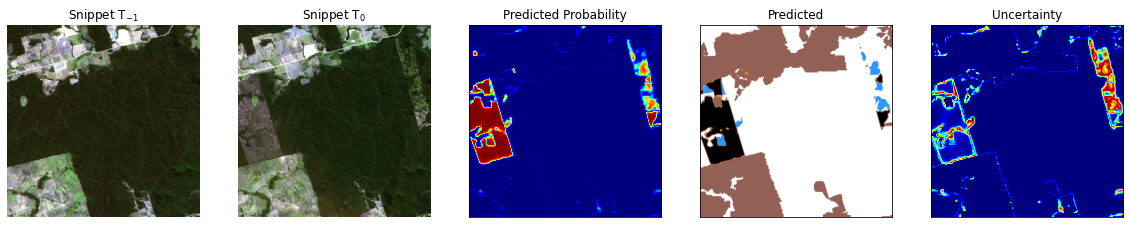

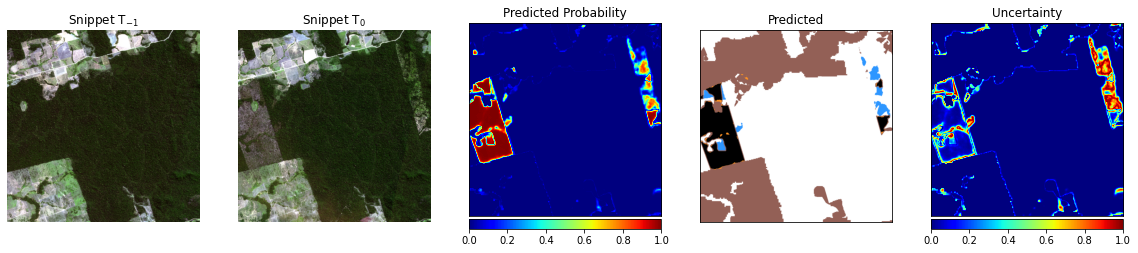

In [112]:
manager.logger.plotCropSampleT0T1(manager)

In [113]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 7.5974895e-12
    np.mean(value): 0.039264183
    np.max(value): 1.0


In [114]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [115]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [116]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [117]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [118]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [119]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [120]:

manager.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (54744486,)
    self.label_mask_current_deforestation_test.shape: (54744486,)


[0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.997, 0.9985]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8710962,)
    predicted_test_classified_incorrect.shape: (8710962,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8710962
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8710962
    len(label_mask_current_deforestation_test): 54744486


[1.         0.58593554 0.00951969 0.15912035 0.8938917  0.81707887
 0.02322776]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8330428,)
    predicted_test_classified_incorrect.shape: (8330428,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8330428
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8330428
    len(label_mask_current_deforestation_test): 54744486


[1.         0.67815957 0.01567709 0.15216926 0.89316012 0.81652203
 0.02422378]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (7784194,)
    predicted_test_classified_incorrect.shape: (7784194,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7784194
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7784194
    len(label_mask_current_deforestation_test): 54744486


[0.99988189 0.80339122 0.03454237 0.14219138 0.89085865 0.81376972
 0.02582392]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (7053476,)
    predicted_test_classified_incorrect.shape: (7053476,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7053476
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7053476
    len(label_mask_current_deforestation_test): 54744486


[0.99582711 0.89455951 0.08341936 0.12884359 0.88476542 0.804969
 0.02831215]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5997944,)
    predicted_test_classified_incorrect.shape: (5997944,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5997944
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5997944
    len(label_mask_current_deforestation_test): 54744486


[0.99512359 0.93653528 0.18485799 0.10956252 0.86927795 0.78302234
 0.03287732]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5250475,)
    predicted_test_classified_incorrect.shape: (5250475,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5250475
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5250475
    len(label_mask_current_deforestation_test): 54744486


[0.99462838 0.94581994 0.25688746 0.09590875 0.85544582 0.76391853
 0.03716198]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4883256,)
    predicted_test_classified_incorrect.shape: (4883256,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4883256
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4883256
    len(label_mask_current_deforestation_test): 54744486


[0.99398257 0.94806233 0.29185284 0.08920087 0.84775663 0.75339763
 0.03969173]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4190298,)
    predicted_test_classified_incorrect.shape: (4190298,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4190298
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4190298
    len(label_mask_current_deforestation_test): 54744486


[0.99318428 0.94804418 0.35140973 0.07654283 0.83240192 0.7339748
 0.04551938]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3676159,)
    predicted_test_classified_incorrect.shape: (3676159,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3676159
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3676159
    len(label_mask_current_deforestation_test): 54744486


[0.99212669 0.94645357 0.39266444 0.06715122 0.82006613 0.71892754
 0.05109177]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3456646,)
    predicted_test_classified_incorrect.shape: (3456646,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3456646
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3456646
    len(label_mask_current_deforestation_test): 54744486


[0.99141532 0.94526661 0.40997643 0.06314145 0.81449438 0.71226882
 0.05388257]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3255715,)
    predicted_test_classified_incorrect.shape: (3255715,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3255715
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3255715
    len(label_mask_current_deforestation_test): 54744486


[0.99040819 0.94425736 0.42638528 0.0594711  0.80911614 0.70552027
 0.05671054]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3104619,)
    predicted_test_classified_incorrect.shape: (3104619,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3104619
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3104619
    len(label_mask_current_deforestation_test): 54744486


[0.98965561 0.94343643 0.43904692 0.05671108 0.80471942 0.7000664
 0.05905007]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2892672,)
    predicted_test_classified_incorrect.shape: (2892672,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2892672
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2892672
    len(label_mask_current_deforestation_test): 54744486


[0.98863088 0.94210867 0.45701586 0.05283951 0.79806122 0.69199233
 0.06269267]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2628171,)
    predicted_test_classified_incorrect.shape: (2628171,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2628171
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2628171
    len(label_mask_current_deforestation_test): 54744486


[0.98752208 0.93996978 0.47977117 0.04800796 0.78871754 0.68129084
 0.0679482 ]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2501596,)
    predicted_test_classified_incorrect.shape: (2501596,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2501596
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2501596
    len(label_mask_current_deforestation_test): 54744486


[0.98695531 0.93894329 0.49087271 0.04569585 0.78383204 0.67570379
 0.07081848]
threshold 0.997


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (33459,)
    predicted_test_classified_incorrect.shape: (33459,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 33459
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 33459
    len(label_mask_current_deforestation_test): 54744486


[8.99539741e-01 8.20945665e-01 8.04668851e-01 6.11184842e-04
 6.09307670e-01 4.36509570e-01 5.37884688e-02]
threshold 0.9985


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (23512,)
    predicted_test_classified_incorrect.shape: (23512,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23512
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23512
    len(label_mask_current_deforestation_test): 54744486


[8.98129921e-01 8.18759164e-01 8.07326584e-01 4.29486177e-04
 6.09398756e-01 4.29475940e-01 3.90728358e-02]


In [121]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54744486,)
    self.label_mask_current_deforestation_test.shape: (54744486,)


threshold 0.0075
(54744486,) (54744486,)
cm_audited [[54009273        0]
 [    4946   730267]]
[1.        0.9932727]
threshold 0.01
(54744486,) (54744486,)
cm_audited [[54009273        0]
 [    5470   729743]]
[1.         0.99255998]
threshold 0.015
(54744486,) (54744486,)
cm_audited [[54009270        3]
 [    6215   728998]]
[0.99999588 0.99154667]
threshold 0.025
(54744486,) (54744486,)
cm_audited [[54009016      257]
 [    7229   727984]]
[0.99964709 0.99016748]
threshold 0.05
(54744486,) (54744486,)
cm_audited [[54008607      666]
 [    9210   726003]]
[0.99908349 0.98747302]
threshold 0.08
(54744486,) (54744486,)
cm_audited [[54008253     1020]
 [   10819   724394]]
[0.99859391 0.98528454]
threshold 0.1
(54744486,) (54744486,)
cm_audited [[54007974     1299]
 [   11755   723458]]
[0.99820768 0.98401144]
threshold 0.15
(54744486,) (54744486,)
cm_audited [[54007500     1773]
 [   14159   721054]]
[0.99754713 0.98074164]
threshold 0.2
(54744486,) (54744486,)
cm_audited [[54006982    

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.9932727 ],
                                  [1.        , 0.99255998],
                                  [0.99999588, 0.99154667],
                                  [0.99964709, 0.99016748],
                                  [0.99908349, 0.98747302],
                                  [0.99859391, 0.98528454],
                                  [0.99820768, 0.98401144],
                                  [0.99754713, 0.98074164],
                                  [0.99682322, 0.97778467],
                                  [0.99637686, 0.9762613 ],
                                  [0.99578183, 0.97482906],
                                  [0.9953089 , 0.97367702],
                                  [0.99462161, 0.97191698],
                                  [0.99378506, 0.9693599 ],
                                  [0.99334278, 0.96808   ],
                                  [0.90171811, 0.

cm_audited [[53941949    67324]
 [  131390   603823]]
[0.89968815 0.82128988]


In [122]:
manager.setPlotLimsForUncertaintyAA()

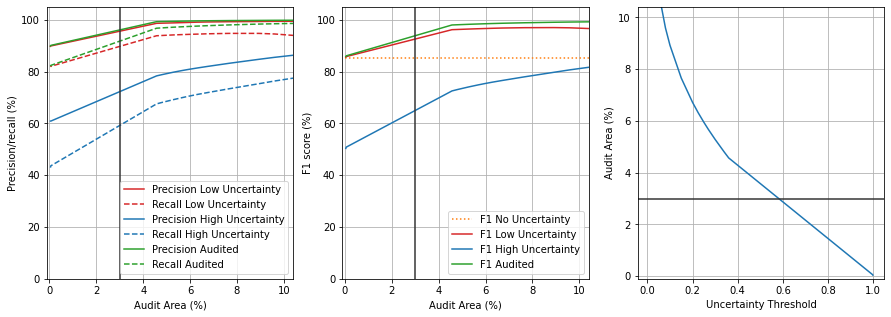

In [123]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [125]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [126]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [127]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, np.max(manager.uncertainty)-0.01))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (1.0000759748947781e-07, 0.99)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.3781464129456984
threshold 0.3781464129456984


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2389370,)
    predicted_test_classified_incorrect.shape: (2389370,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2389370
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2389370
    len(label_mask_current_deforestation_test): 54744486


[0.98640549 0.9380478  0.50075964 0.04364586 0.77931137 0.67049569
 0.07359476]
0.6118536870618989
threshold 0.6118536870618989


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (953498,)
    predicted_test_classified_incorrect.shape: (953498,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 953498
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 953498
    len(label_mask_current_deforestation_test): 54744486


[0.97344976 0.9060511  0.61378947 0.01741724 0.71721211 0.61858278
 0.146452  ]
0.7562927258837994
threshold 0.7562927258837994


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (485742,)
    predicted_test_classified_incorrect.shape: (485742,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 485742
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 485742
    len(label_mask_current_deforestation_test): 54744486


[0.95672082 0.87781241 0.67723367 0.00887289 0.6775076  0.5955832
 0.20008899]
0.508500964193368
threshold 0.508500964193368


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1561699,)
    predicted_test_classified_incorrect.shape: (1561699,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1561699
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1561699
    len(label_mask_current_deforestation_test): 54744486


[0.98086325 0.92464708 0.56678405 0.02852706 0.74506636 0.637009
 0.10307347]
0.4976461922812795
threshold 0.4976461922812795


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1633215,)
    predicted_test_classified_incorrect.shape: (1633215,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1633215
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1633215
    len(label_mask_current_deforestation_test): 54744486


[0.98144825 0.92627447 0.56161956 0.02983342 0.74800021 0.63936318
 0.09960481]
0.4520013382231998
threshold 0.4520013382231998


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1931372,)
    predicted_test_classified_incorrect.shape: (1931372,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1931372
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1931372
    len(label_mask_current_deforestation_test): 54744486


[0.98372616 0.93239534 0.53919068 0.03527975 0.76015509 0.65004354
 0.08750616]
0.48844243200405835
threshold 0.48844243200405835


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1693646,)
    predicted_test_classified_incorrect.shape: (1693646,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1693646
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1693646
    len(label_mask_current_deforestation_test): 54744486


[0.98194299 0.92765555 0.55725348 0.03093729 0.75041653 0.64131597
 0.09688362]
0.4971593773736611
threshold 0.4971593773736611


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1636377,)
    predicted_test_classified_incorrect.shape: (1636377,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1636377
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1636377
    len(label_mask_current_deforestation_test): 54744486


[0.98147835 0.92634504 0.56139649 0.02989117 0.7481188  0.63946363
 0.09945831]
0.4948476546063175
threshold 0.4948476546063175


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1651696,)
    predicted_test_classified_incorrect.shape: (1651696,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1651696
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1651696
    len(label_mask_current_deforestation_test): 54744486


[0.98160231 0.92668802 0.56024309 0.030171   0.74877061 0.64000495
 0.09875343]
0.49627637784910283
threshold 0.49627637784910283


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642220,)
    predicted_test_classified_incorrect.shape: (1642220,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642220
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642220
    len(label_mask_current_deforestation_test): 54744486


[0.98152238 0.92644925 0.56095308 0.02999791 0.74837455 0.63970129
 0.09917895]
0.4957306541308758
threshold 0.4957306541308758


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1645831,)
    predicted_test_classified_incorrect.shape: (1645831,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1645831
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1645831
    len(label_mask_current_deforestation_test): 54744486


[0.98155393 0.92654552 0.5607001  0.03006387 0.7485119  0.63979773
 0.09901741]
0.4963489832220919
threshold 0.4963489832220919


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1641734,)
    predicted_test_classified_incorrect.shape: (1641734,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641734
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641734
    len(label_mask_current_deforestation_test): 54744486


[0.98151418 0.92644314 0.56098845 0.02998903 0.74836024 0.63968002
 0.09920172]
0.49615214150186515
threshold 0.49615214150186515


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1643060,)
    predicted_test_classified_incorrect.shape: (1643060,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1643060
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1643060
    len(label_mask_current_deforestation_test): 54744486


[0.9815297  0.92647495 0.56089052 0.03001325 0.74840916 0.63972314
 0.09914252]
0.4962430371548013
threshold 0.4962430371548013


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642457,)
    predicted_test_classified_incorrect.shape: (1642457,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642457
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642457
    len(label_mask_current_deforestation_test): 54744486


[0.9815286  0.92645876 0.5609286  0.03000224 0.74838377 0.63971042
 0.09917086]
0.4963097185434044
threshold 0.4963097185434044


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1641993,)
    predicted_test_classified_incorrect.shape: (1641993,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641993
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641993
    len(label_mask_current_deforestation_test): 54744486
ic| 2231348037.py:18 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.49627637784910283


[0.98152044 0.92644241 0.56096533 0.02999376 0.74836844 0.63969894
 0.09918907]


In [128]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.49627637784910283
threshold 0.49627637784910283


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642220,)
    predicted_test_classified_incorrect.shape: (1642220,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642220
    len(label_mask_current_deforestation_test): 54744486
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642220
    len(label_mask_current_deforestation_test): 54744486


[0.98152238 0.92644925 0.56095308 0.02999791 0.74837455 0.63970129
 0.09917895]
threshold 0.49627637784910283
(54744486,) (54744486,)


ic| base.py:825 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999791]),
                     'UEO': array([0.09917895]),
                     'f1': 85.22,
                     'f1_H': array([0.68978388]),
                     'f1_L': array([0.95319098]),
                     'precision_H': array([0.74837455]),
                     'precision_L': array([0.98152238]),
                     'recall_H': array([0.63970129]),
                     'recall_L': array([0.92644925]),
                     'recall_Ltotal': array([0.56095308])}
ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.97197685]),
                             'precision': array([0.98906841]),
                             'recall': array([0.95546597])}


cm_audited [[54001509     7764]
 [   32742   702471]]
[0.98906841 0.95546597]


{'metrics': {'precision_L': array([0.98152238]),
  'recall_L': array([0.92644925]),
  'recall_Ltotal': array([0.56095308]),
  'AA': array([0.02999791]),
  'precision_H': array([0.74837455]),
  'recall_H': array([0.63970129]),
  'UEO': array([0.09917895]),
  'f1_L': array([0.95319098]),
  'f1_H': array([0.68978388]),
  'f1': 85.22},
 'metrics_audited': {'precision': array([0.98906841]),
  'recall': array([0.95546597]),
  'f1': array([0.97197685])},
 'exp': 10}